In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Считываем датафрейм, смотрим что внутри
df = pd.read_csv("./netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [39]:
# Размер датафрейма и общая информация
print("\nРазмер датафрейма:", df.shape)
print("\nОбщая информация о данных:")
print(df.info())


Размер датафрейма: (8807, 12)

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
# Список колонок и их типы
print("\nИспользуемые колонки и их типы:")
print(df.dtypes)


Используемые колонки и их типы:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [12]:
# Посмотрим количество пропусков в каждой колонке
missing_values = df.isnull().sum()
print("\nКоличество пропусков в каждой колонке:")
print(missing_values)


Количество пропусков в каждой колонке:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [14]:
# Посмотрим на статистику выбросов в столбце Год релиза
numeric_columns = df.select_dtypes(include=['int64']).columns
outliers = {}
for column in numeric_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    outliers[column] = len(df[(df[column] < q1 - 1.5 * iqr) | (df[column] > q3 + 1.5 * iqr)])

print(outliers)

{'release_year': 719}


In [15]:
# Выведем его статистику
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


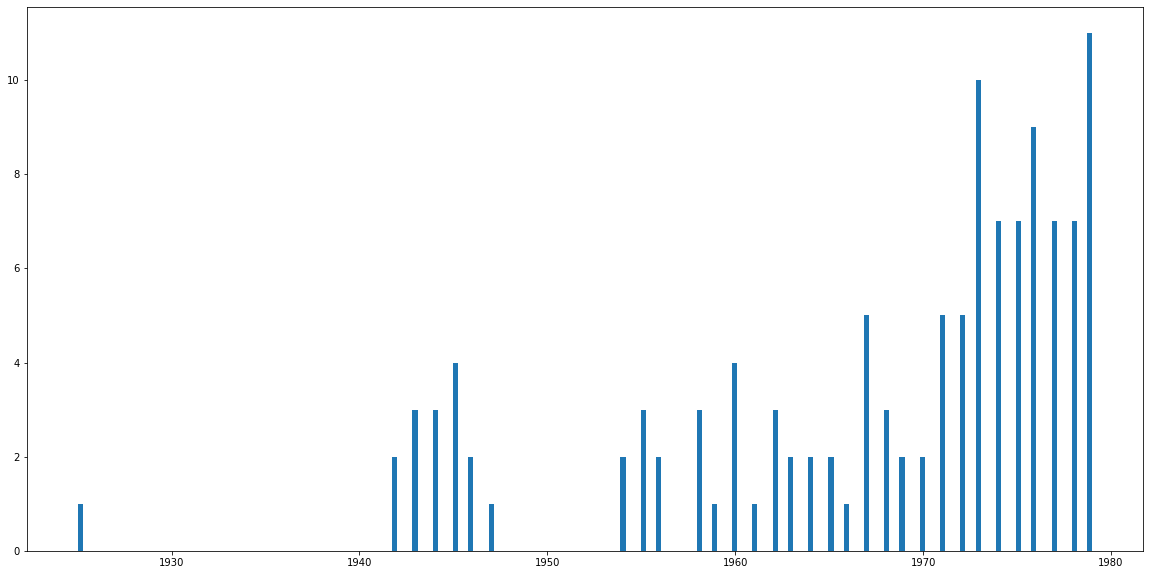

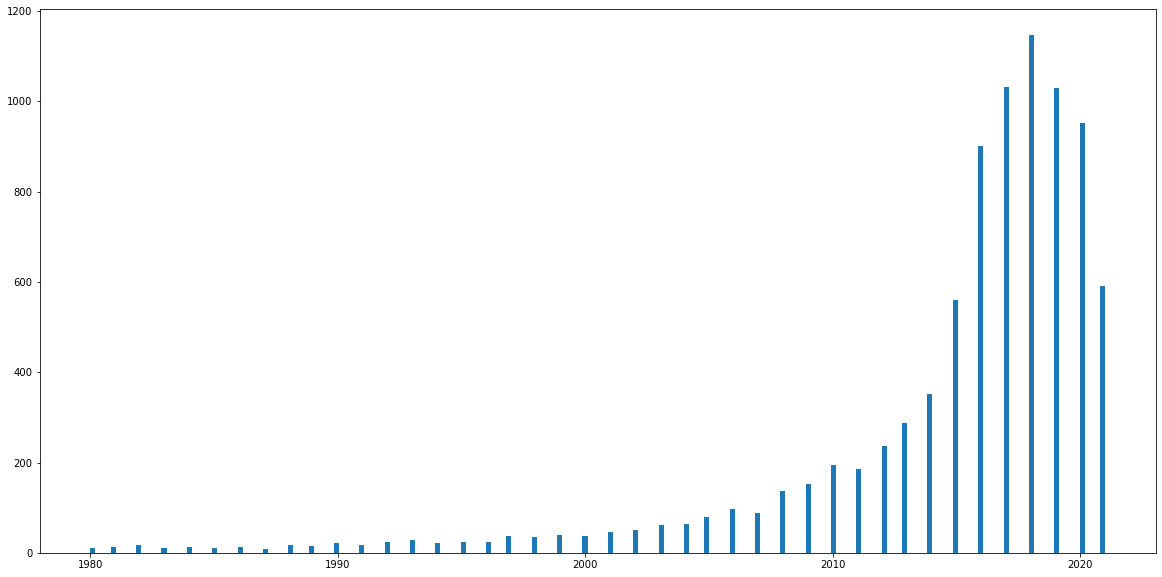

In [31]:

plt.figure(figsize=(20,10))
plt.hist(df[df['release_year']<1980]['release_year'], bins=200)
plt.show()

plt.figure(figsize=(20,10))
plt.hist(df[df['release_year']>=1980]['release_year'], bins=200)
plt.show()

#После 2000 года виден существенный рост производства фильмов, до 1960х есть года без фильмов

In [32]:
# Посмотрим на страны, и визуализируем по кол-ву выпущенных фильмов
df.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

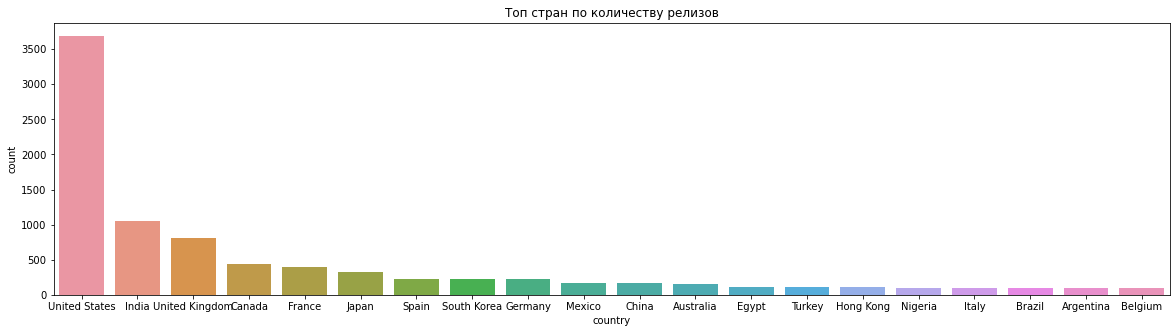

In [102]:
df_country_expanded = pd.DataFrame(
    df[df['release_year'] >= 1925][['show_id', 'country']]
    .assign(country=df['country'].str.split(', '))
    .explode('country', ignore_index=True)
)
plt.figure(figsize=(20, 5))
sns.countplot(x='country', data=df_country_expanded, order=df_country_expanded['country'].value_counts().iloc[:20].index)
plt.title("Топ стран по количеству релизов")
plt.show()

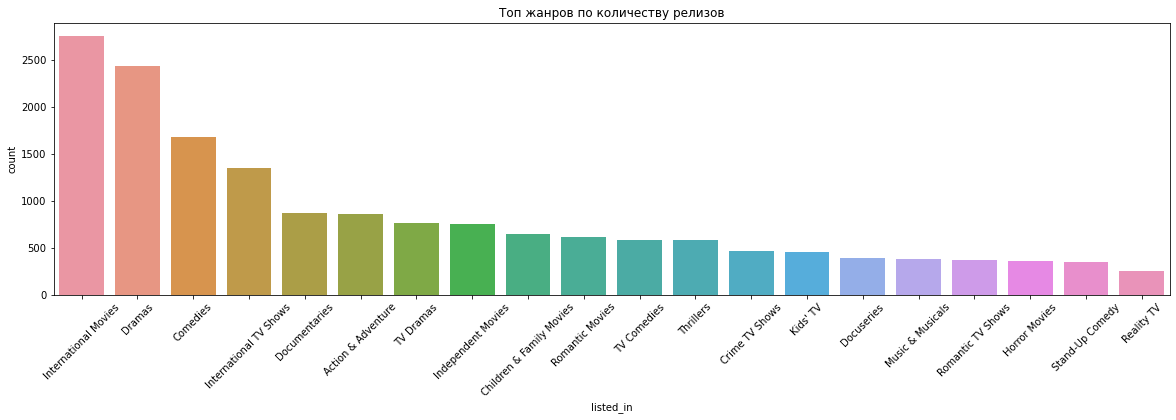

In [58]:
# Топ жанров по количеству релизов
df_genre_expanded = (
    df[df['release_year'] >= 1925][['show_id', 'listed_in']]
    .assign(listed_in=df['listed_in'].str.split(', '))
    .explode('listed_in', ignore_index=True)
)
plt.figure(figsize=(20, 5))
sns.countplot(x='listed_in', data=df_genre_expanded, order=df_genre_expanded['listed_in'].value_counts().iloc[:20].index)
plt.title("Топ жанров по количеству релизов")
plt.xticks(rotation=45)
plt.show()


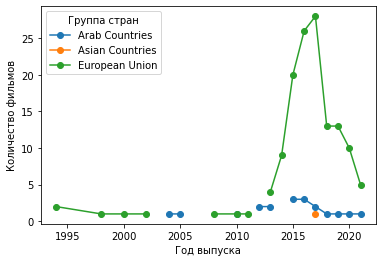

In [123]:

# Проверим гипотезу, что в разных частях планеты люди предпочитают разные жанры 
european_union_countries = ['Germany', 'Italy', 'France', 'Spain', 'United Kingdom']
asian_countries = ['China', 'South Korea', 'Japan', 'Hong Kong']
arab_countries = ['India', 'Egypt', 'Turkey']

# Функция для определения групп стран
def define_country_group(country):
    if country in european_union_countries:
        return 'European Union'
    elif country in asian_countries:
        return 'Asian Countries'
    elif country in arab_countries:
        return 'Arab Countries'

df['country_group'] = df['country'].apply(define_country_group)

# Фильтрация данных по жанру 
df_thrillers = df[df['listed_in'].str.contains('Documentaries')]
# df_thrillers = df[df['listed_in'].str.contains('Comedies')]
# df_thrillers = df[df['listed_in'].str.contains('Dramas')]


# Группировка данных по годам выпуска, группам стран и жанру
films_by_year_and_group = df_thrillers.groupby(['release_year', 'country_group']).size().unstack()

# Построение графика
films_by_year_and_group.plot(kind='line', marker='o')

plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.legend(title='Группа стран')
plt.show()

# Видно, что в Европе снимается значительно больше документальных фильмов. Если смотреть на 
# более развлекательные жанры, то в целом популярность у групп схожая и зависит от кол-ва производимых фильмов в каждой группе.

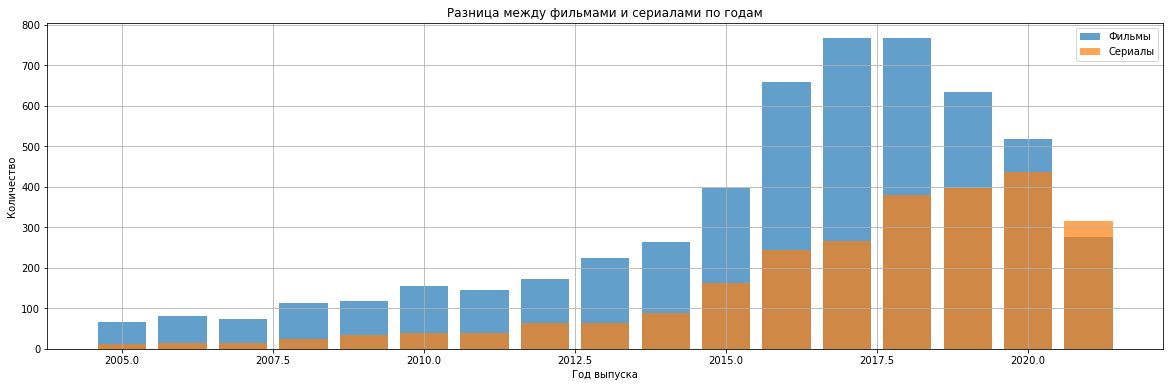

In [135]:

# Посмотрим на соотношение фильмов и сериалов
df = df[df['release_year'] >= 2005]

df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

movies_by_year = df_movies.groupby('release_year').size()
tv_shows_by_year = df_tv_shows.groupby('release_year').size()

plt.figure(figsize=(20, 6))
plt.bar(movies_by_year.index, movies_by_year, label='Фильмы', alpha=0.7)
plt.bar(tv_shows_by_year.index, tv_shows_by_year, label='Сериалы', alpha=0.7)

plt.title('Разница между фильмами и сериалами по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

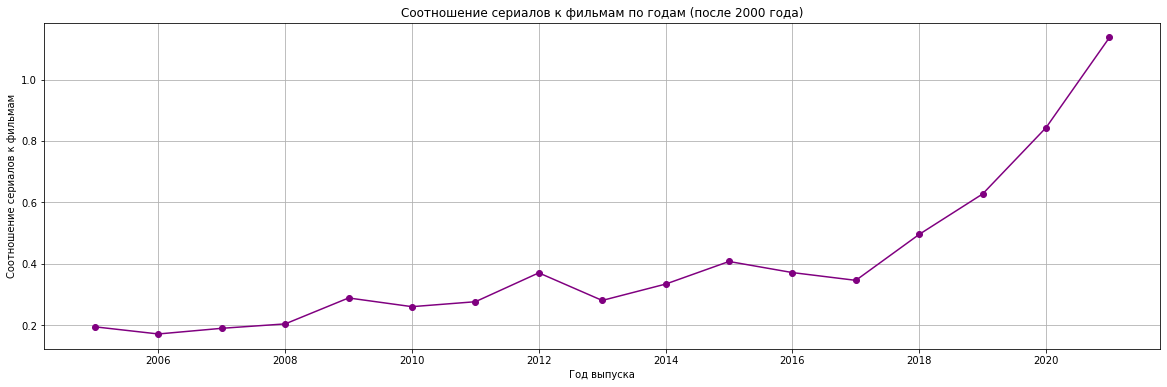

In [141]:
from scipy.stats import pearsonr
# Проверим, что соотношение сериалов и фильмов сокращается

# Расчет соотношения сериалов к фильмам
ratio_by_year = tv_shows_by_year / movies_by_year

plt.figure(figsize=(20, 6))
plt.plot(ratio_by_year.index, ratio_by_year, marker='o', color='purple')

plt.title('Соотношение сериалов к фильмам по годам ')
plt.xlabel('Год выпуска')
plt.ylabel('Соотношение сериалов к фильмам')
plt.grid(True)
plt.show()
# Видим, что соотношение сериалов к фильмам уравнивается, в последние годы в особенности

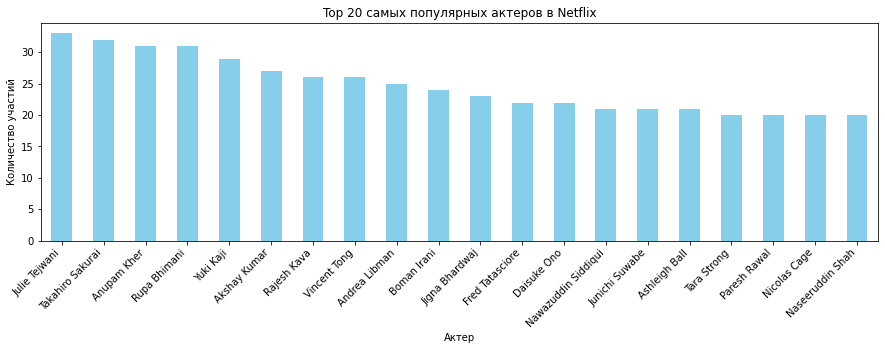

In [156]:
# Посмотрим на самых популярных актеров
cast_list = df['cast'].dropna().str.split(', ').explode()

cast_counts = cast_list.value_counts()

top_n_actors = 20
top_actors = cast_counts.head(top_n_actors)

plt.figure(figsize=(15, 4))
top_actors.plot(kind='bar', color='skyblue')

plt.title(f'Top {top_n_actors} самых популярных актеров в Netflix')
plt.xlabel('Актер')
plt.ylabel('Количество участий')
plt.xticks(rotation=45, ha='right')
plt.show()

In [159]:
# Добавим в таблицу столбец, указывающий возраст фильма
df['content_age'] = pd.to_datetime('now').year - df['release_year']

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_group,content_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",None,3
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",None,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,None,2
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",None,2
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Arab Countries,2
